## Import Dependencies

In [33]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # For using Seaborn themes with matplotlib functions
import statsmodels.api as sm
import json
import os

from pathlib import Path
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, explained_variance_score, mean_absolute_error, mean_squared_error, classification_report

%matplotlib inline

## Import Dataset from our GitHub Repository
Note: We have already downloaded our dataset from Kaggle into our GitHub project repository. The original dataset from Kaggle is linked here:

https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

In [2]:
url = 'https://raw.githubusercontent.com/Faith-Hall/project-4-group-4/main/Resources/realtor-data.csv'
housing_df = pd.read_csv(url)
housing_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1204061,for_sale,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,NaN,536250.0
1204062,for_sale,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,NaN,550000.0
1204063,for_sale,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,NaN,449900.0
1204064,for_sale,3.0,3.0,4.79,North Greenbush,New York,12198.0,2950.0,NaN,657850.0


## Clean the Data

In [3]:
# Select columns to keep
housing_df_reduced = housing_df[['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'price']]
housing_df_reduced

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,65000.0
...,...,...,...,...,...,...,...,...
1204061,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,536250.0
1204062,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,550000.0
1204063,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,449900.0
1204064,3.0,3.0,4.79,North Greenbush,New York,12198.0,2950.0,657850.0


In [4]:
# Drop null values
housing_df_clean = housing_df_reduced.dropna(how='any')
housing_df_clean

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
5,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,179000.0
...,...,...,...,...,...,...,...,...
1204060,4.0,3.0,0.56,North Greenbush,New York,12198.0,2231.0,581625.0
1204061,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,536250.0
1204062,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,550000.0
1204063,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,449900.0


Because the prices of the homes are heavily dependent on location, we are chosing to focus on the state of New York.  This will make the relationship between the house features and price more comparable for analysis.

## Further Cleaning

In [5]:
# Filtering down to just New York
value_NY = 'New York'
filtered_df = housing_df_clean[housing_df_clean['state'] == value_NY]
filtered_df

,bed,bath,acre_lot,city,state,zip_code,house_size,price
30149,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,175000.0
54248,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,425000.0
54258,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,225000.0
54259,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,419000.0
54262,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,365000.0
...,...,...,...,...,...,...,...,...
1204060,4.0,3.0,0.56,North Greenbush,New York,12198.0,2231.0,581625.0
1204061,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,536250.0
1204062,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,550000.0
1204063,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,449900.0


## Preliminary Data Exploration

In [6]:
# Find number of unique cities in New York
unique_ny = housing_df_clean['city'].nunique()
unique_ny

2641

In [7]:
# Find value counts of cities in New York
count_ny = filtered_df['city'].value_counts()
count_ny

New York City        10190
Brooklyn             10038
Bronx                 8353
Staten Island         7465
Albany                5375
                     ...  
Olive                    1
North Hudson             1
Cottekill                1
Cold Spring Hrbr         1
Richfield Springs        1
Name: city, Length: 849, dtype: int64

Note: the above dataset is saved as "ny_data.csv" in our GitHub project repository.

## Further Cleaning II

In [8]:
# Reduce dataframe to homes with less than 5 bedrooms and 5 bathrooms
cleanest_data = filtered_df[(filtered_df['bed'] < 5) & (filtered_df['bath'] < 5)]
cleanest_data

,bed,bath,acre_lot,city,state,zip_code,house_size,price
30149,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,175000.0
54248,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,425000.0
54258,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,225000.0
54259,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,419000.0
54262,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,365000.0
...,...,...,...,...,...,...,...,...
1204060,4.0,3.0,0.56,North Greenbush,New York,12198.0,2231.0,581625.0
1204061,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,536250.0
1204062,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,550000.0
1204063,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,449900.0


Note: the above datset is saved as "ny_data_cleanest.csv" in our GitHub project repository

## Examination of the dataset to Inform the ML Process

In [9]:
# Look for unique values

df = cleanest_data

for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For bed,4 unique values present
For bath,4 unique values present
For acre_lot,996 unique values present
For city,800 unique values present
For state,1 unique values present
For zip_code,839 unique values present
For house_size,2758 unique values present
For price,2420 unique values present


In [10]:
# Drop columns that are not required
df = df.drop(["city", "state"], axis = 1,)
df.head()

,bed,bath,acre_lot,zip_code,house_size,price
30149,3.0,1.0,60.00,12022.0,1176.0,175000.0
54248,3.0,2.0,2.02,12521.0,1600.0,425000.0
54258,4.0,2.0,0.24,12521.0,1239.0,225000.0
54259,3.0,3.0,1.90,12516.0,1800.0,419000.0
54262,3.0,2.0,2.00,12517.0,1482.0,365000.0


<Figure size 1000x600 with 0 Axes>

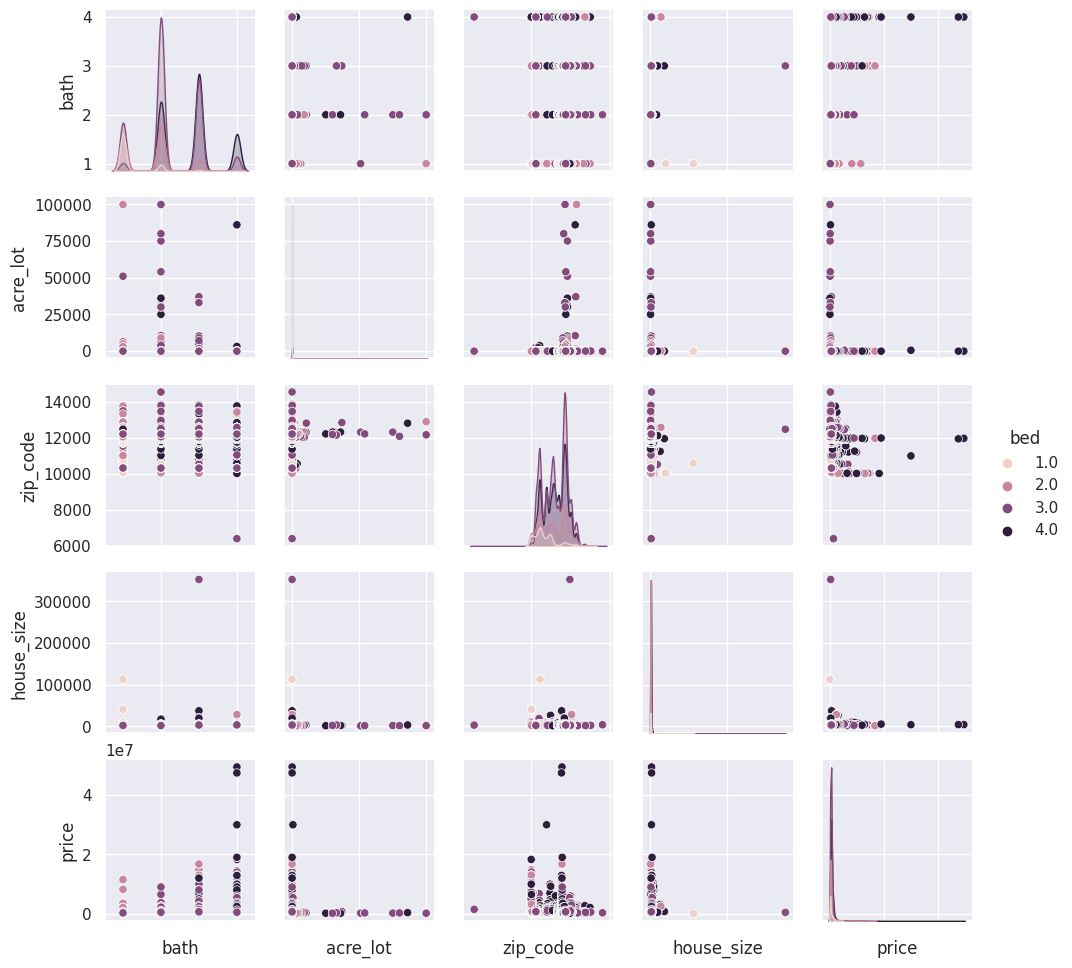

In [11]:
# Visualize data using Seaborn
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df[['bed','bath','acre_lot','zip_code','house_size', 'price']]
                 ,hue='bed',height=2)
g.set(xticklabels=[])

<Axes: >

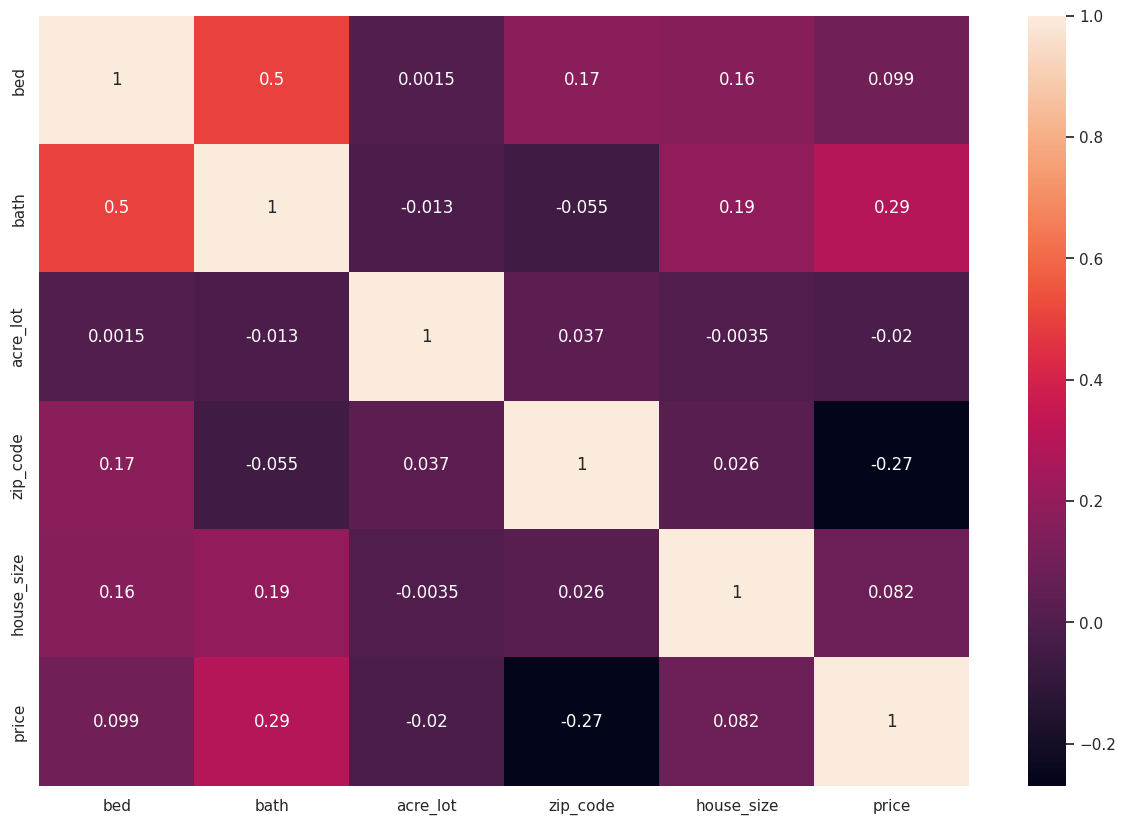

In [12]:
# Use a heatmap to Plot the co relation between variables
plt.figure(figsize=(15,10))
columns =['bed','bath','acre_lot','zip_code','house_size', 'price']
sns.heatmap(df[columns].corr(),annot=True)

## Explore and Compare Different Model Types to Determine Which One to Use

In [13]:
# Define the features set
X = df.copy()
X.drop("price", axis = 1, inplace = True)
X.head()

,bed,bath,acre_lot,zip_code,house_size
30149,3.0,1.0,60.00,12022.0,1176.0
54248,3.0,2.0,2.02,12521.0,1600.0
54258,4.0,2.0,0.24,12521.0,1239.0
54259,3.0,3.0,1.90,12516.0,1800.0
54262,3.0,2.0,2.00,12517.0,1482.0


In [14]:
# Define the target vector
y = df["price"]
y.value_counts()

599000.0     1700
699000.0     1695
799000.0     1594
649000.0     1060
899000.0     1053
             ... 
2549000.0       1
2485000.0       1
634500.0        1
1370000.0       1
429669.0        1
Name: price, Length: 2420, dtype: int64

In [15]:
# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 78)

In [16]:
# First try multiple linear regression
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [17]:
# Next try Decision Tree
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [18]:
# Next try the Random Forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

## Score the different models

In [19]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Plot as a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  15
Decision tree  Regression Model Score is  99
Random Forest Regression Model Score is  99


,Model,Score,Explained Variance Score
2,Random forest Regression,0.992927,0.992763
1,Decision Tree,0.991127,0.991167
0,Multiple Linear Regression,0.145016,-4.770639


## Model Comparison Conclusions
It can be seen that both the Decision Tree and Random Forest Regression models offer similar performance. Based on the scoring above, as well as input from literature ("Combining Machine Learning models to predict House Prices", Author: ISAAC AKE) we have decided to pursue the Random Forest model to predict which features have the greatest impact on home prices and to predict the price of a home based on the most important features.

## Model Develpment - Feature Ranking

In [20]:
# Split the data into training and testing set using a 70/30 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 78)

In [21]:
# Instantiate and fit the RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 78)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=78)

In [22]:
# Make predictions
y_predictions = rfr.predict(X_test)

In [23]:
# View Predictions
predictions = pd.DataFrame({'y_test':y_test, 'y_predictions':y_predictions})
predictions.head()

,y_test,y_predictions
817059,615000.0,615000.00
954677,895000.0,895000.00
1189225,379900.0,379900.00
569920,199000.0,199000.00
1138096,975000.0,968194.99


In [24]:
# Assess the model's performance using the mean squared error function
mean_squared_error(y_test, y_predictions)

12536757513.7654

## Feature Importance

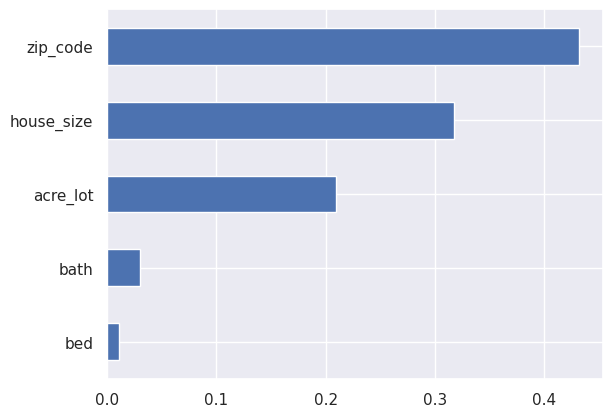

In [25]:
# Rank features
feature_rankings = pd.Series(rfr.feature_importances_, index = X_train.columns, name="Importance"). sort_values(ascending = True, inplace = False)
ax = feature_rankings.plot(kind='barh')

## Evaluate the Models Performance on the Test Dataset

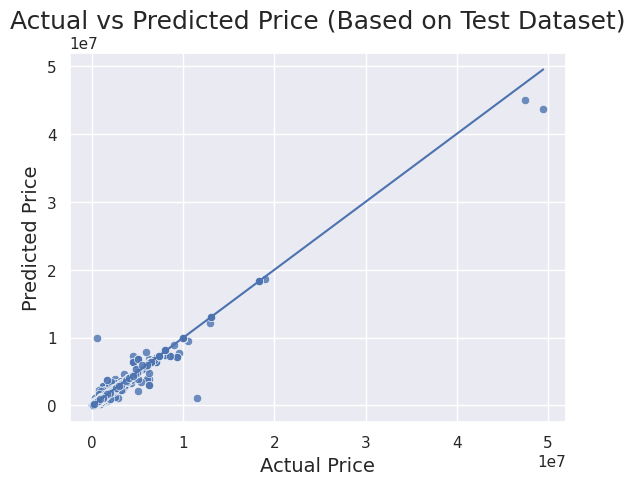

In [27]:
sns.scatterplot(x=y_test, y=y_predictions, alpha = 0.8)
sns.lineplot(x=y_test, y=y_test)

plt.xlabel("Actual Price", fontsize = 14)
plt.ylabel("Predicted Price", fontsize = 14)
plt.title("Actual vs Predicted Price (Based on Test Dataset)", fontsize = 18)
plt.show()

In [30]:
# Get the R^2 value
np.round(rfr.score(X_test, y_test), 4)

0.9831

In [31]:
# NOTE: The units of RMSE are dollars because our target is price
MSE_test = round(np.mean(np.square(y_test - y_predictions)), 2)
RMSE_test = round(np.sqrt(MSE_test), 2)
RMSE_test

111967.66

## Tuning Hyperparameters Using GridSearchCV

In [32]:
my_param_grid = {'n_estimators':[10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

In [34]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state = 78), param_grid=my_param_grid, refit=True, verbose=2, cv=5)

In [35]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   1.4s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.6s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.8s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.6s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.5s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   3.7s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   2.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   3.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   3.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   2.8s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=  15.5s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=78),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [36]:
# Get the best parameters
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}

In [37]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=78)

In [38]:
y_predictions_optimized = grid.predict(X_test)

In [39]:
predictions['y_predictions_optimized'] = y_predictions_optimized
predictions.head()

,y_test,y_predictions,y_predictions_optimized
817059,615000.0,615000.00,616758.449717
954677,895000.0,895000.00,815762.157687
1189225,379900.0,379900.00,379835.352273
569920,199000.0,199000.00,203486.415168
1138096,975000.0,968194.99,951151.099060


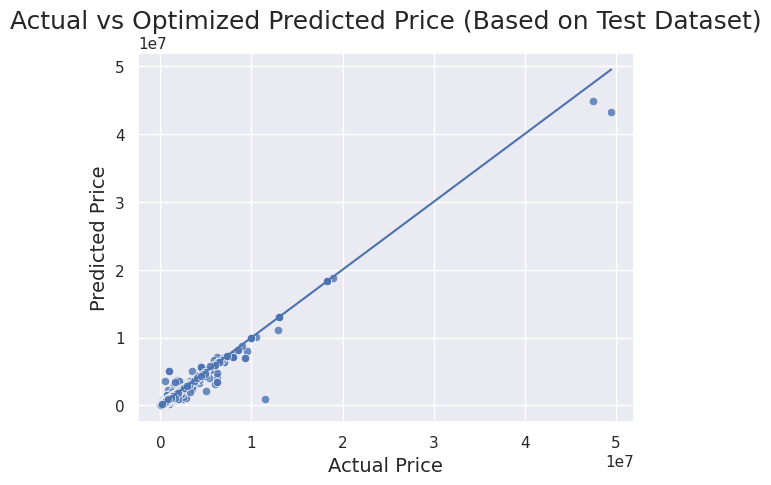

In [40]:
sns.scatterplot(x=y_test, y=y_predictions_optimized, alpha = 0.8)
sns.lineplot(x=y_test, y=y_test)

plt.xlabel("Actual Price", fontsize = 14)
plt.ylabel("Predicted Price", fontsize = 14)
plt.title("Actual vs Optimized Predicted Price (Based on Test Dataset)", fontsize = 18)
plt.show()

In [41]:
np.round(grid.score(X_test, y_test), 4)

0.9843

In [42]:
MSE_test_optimized = round(np.mean(np.square(y_test - y_predictions_optimized)), 2)
RMSE_test_optimized = round(np.sqrt(MSE_test), 2)
RMSE_test_optimized

111967.66

Compare the initial values of R2 and RMSE to the GridSearchCV optimized values of R2 and RMSE:
* Initial (R2 = 0.9831 & RMSE = 111967.66)
* GridSearchCV Optimized (R2 = 0.9843 & RMSE = 111967.66)

It can be seen that the R2 was slightly improved after optimization with GridSearchCV.

## Use cross validation and Out Of Bag (OOB) observations to estimate the R2 in the test set

Use cross validation to estimate the performance of the model on the test dataset

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=100), X=X_train, y=y_train, cv=5, scoring="r2")

In [46]:
R2_cross_validation = round(np.mean(R2), 4)
R2_cross_validation

0.9564

## Out Of Bag (OOB) errors
Here, we show that on average each bagged tree makes use of approximately 2/3 of the observations - essentially meaning that 1/3 of the observations are left out and as such, not used to fit the model. The left out observations are called the out-of-bag (OOB) observations.

In [47]:
np.random.choice (100, size = 100)

array([74, 87, 27, 86, 16, 89, 60, 24, 22,  3, 82, 19, 45, 55, 30, 72, 94,
       19, 68, 13, 86,  5, 66,  2, 57, 30, 68, 42, 72, 71, 64, 88,  9, 50,
       44, 86, 35, 48, 16, 26, 47, 95, 83, 56, 74, 34, 73, 67, 11, 38, 17,
       83, 73, 34, 42, 31, 14, 43, 95, 41, 60, 12, 83, 33, 70, 73, 14, 23,
       77, 85, 58, 35,  2, 63,  4, 23, 68, 33, 88, 96, 66, 64, 49,  2, 44,
       61, 94, 49, 45,  2, 11, 37, 85, 26, 34, 60, 49, 42, 74, 63])

In [48]:
np.unique(np.random.choice (100, size = 100)).size

64

In [49]:
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=100, oob_score = True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', oob_score=True)

In [50]:
RF_oob.oob_score_

0.9611630842099361

Note: The OOB score (0.9612) is very close to the estimated R2 score from above (9564)

## Check Feature Importance on the Optimized Model

In [51]:
rfr = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=100, random_state=78)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=78)

In [52]:
optimized_feature_rankings = rfr.feature_importances_
optimized_feature_rankings

array([0.03355313, 0.06790748, 0.21258409, 0.46680841, 0.2191469 ])

In [64]:
OFR_dataframe = pd.DataFrame({'Feature':X_train.columns, 'Feature Importance':optimized_feature_rankings})
OFR_dataframe = OFR_dataframe.sort_values(by = 'Feature Importance', ascending = False).reset_index(drop = True)
OFR_dataframe

,Feature,Feature Importance
0,zip_code,0.466808
1,house_size,0.219147
2,acre_lot,0.212584
3,bath,0.067907
4,bed,0.033553


<function matplotlib.pyplot.show(close=None, block=None)>

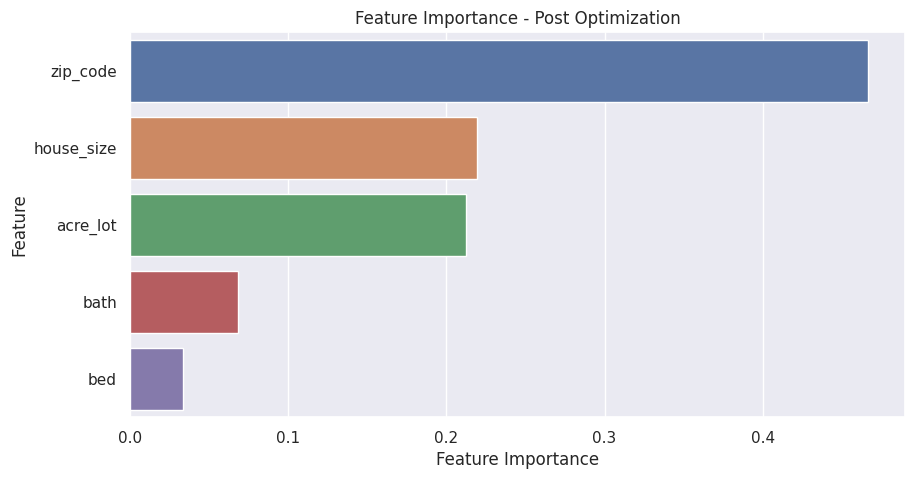

In [65]:
plt.figure(figsize = (10, 5))
plt.title("Feature Importance - Post Optimization")
sns.barplot(y = "Feature", x = "Feature Importance", data = OFR_dataframe)
plt.show